CREDIT CARD FRAUD DETECTION

Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path="/content/creditcard.csv"
data=pd.read_csv(path)

In [ ]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124856,77448,-0.835868,0.673600,1.904021,-0.263201,0.351435,0.236937,0.223675,0.334808,-0.232802,...,0.114441,0.182323,-0.105240,-0.357454,-0.357218,-0.704835,0.014996,0.144135,4.99,0.0
124857,77448,-2.817937,-0.107162,0.402607,-0.980962,0.682698,0.980801,0.117625,1.387942,-0.779965,...,0.280573,0.323453,-0.374319,-0.962394,0.422271,0.402743,-0.288024,-0.339470,115.00,0.0
124858,77449,-1.262504,1.434804,0.290138,-0.436888,0.801078,0.380510,0.399066,0.554237,-0.531654,...,0.195197,0.383922,-0.281029,-1.152876,0.030816,-0.486364,-0.148485,0.121988,1.07,0.0
124859,77449,1.087845,0.522904,0.275704,2.474583,0.213114,-0.225345,0.389247,-0.100848,-0.960723,...,0.007535,-0.054694,-0.061887,0.083010,0.527815,0.030754,-0.017737,0.020217,45.95,0.0


In [ ]:
#Dataset First View
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


Dataset Info

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65453 entries, 0 to 65452
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    65453 non-null  int64  
 1   V1      65453 non-null  float64
 2   V2      65453 non-null  float64
 3   V3      65453 non-null  float64
 4   V4      65453 non-null  float64
 5   V5      65453 non-null  float64
 6   V6      65453 non-null  float64
 7   V7      65453 non-null  float64
 8   V8      65453 non-null  float64
 9   V9      65453 non-null  float64
 10  V10     65453 non-null  float64
 11  V11     65452 non-null  float64
 12  V12     65452 non-null  float64
 13  V13     65452 non-null  float64
 14  V14     65452 non-null  float64
 15  V15     65452 non-null  float64
 16  V16     65452 non-null  float64
 17  V17     65452 non-null  float64
 18  V18     65452 non-null  float64
 19  V19     65452 non-null  float64
 20  V20     65452 non-null  float64
 21  V21     65452 non-null  float64
 22

Dataset rows and columns count

In [ ]:
data.shape

(65453, 31)

Duplicate values

In [ ]:
num_duplicate_rows=data.duplicated().sum()
print(num_duplicate_rows)

260


Missing Values

In [ ]:
data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


Plotting missing values count for each column

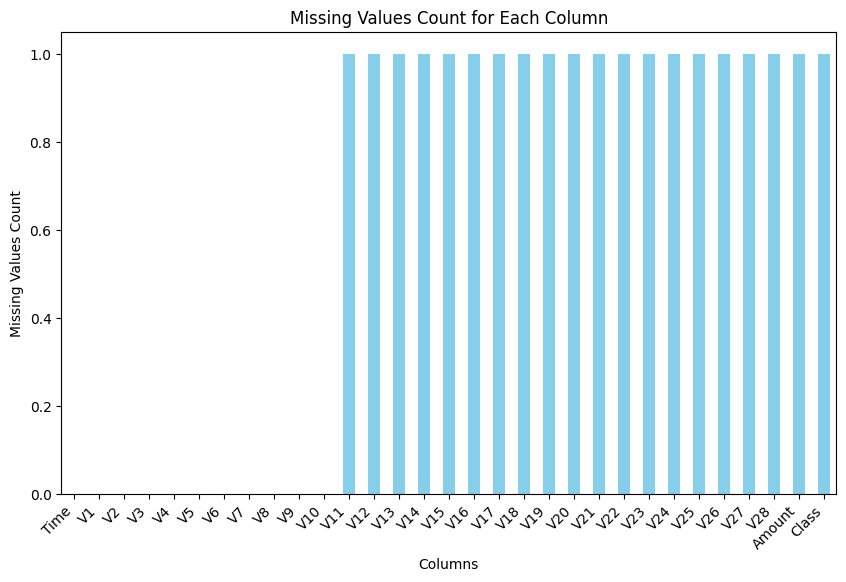

In [ ]:
plt.figure(figsize=(10,6))
data.isnull().sum().plot(kind='bar', color='skyblue')
plt.title('Missing Values Count for Each Column')
plt.xlabel('Columns')
plt.ylabel('Missing Values Count')
plt.xticks(rotation=45, ha='right')
plt.show()


Understanding Variables

In [ ]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,65453.000000,65453.000000,65453.000000,65453.000000,65453.000000,65453.000000,65453.000000,65453.000000,65453.000000,65453.000000,...,65452.000000,65452.000000,65452.000000,65452.000000,65452.000000,65452.000000,65452.000000,65452.000000,65452.000000,65452.000000
mean,33429.846867,-0.240575,-0.012987,0.684068,0.171729,-0.266835,0.103221,-0.113163,0.059434,0.037196,...,-0.028511,-0.106841,-0.039098,0.005598,0.136732,0.019958,0.002181,0.004243,96.276149,0.002582
std,14078.168886,1.857128,1.649806,1.426716,1.378742,1.388857,1.306443,1.254939,1.223332,1.170955,...,0.729616,0.637402,0.603012,0.596708,0.439030,0.497424,0.381480,0.322063,270.242777,0.050749
min,0.000000,-56.407510,-72.715728,-32.965346,-5.172595,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,...,-34.830382,-10.933144,-26.751119,-2.836627,-7.495741,-2.534330,-8.567638,-9.617915,0.000000,0.000000
25%,27748.000000,-1.000865,-0.585921,0.197913,-0.723647,-0.884703,-0.636487,-0.602981,-0.142531,-0.662885,...,-0.226897,-0.526780,-0.179573,-0.326243,-0.127572,-0.329428,-0.062871,-0.005887,7.680000,0.000000
50%,36941.000000,-0.243460,0.075028,0.774169,0.189237,-0.298678,-0.148843,-0.073032,0.065169,-0.057666,...,-0.062061,-0.081680,-0.051837,0.061257,0.174456,-0.076200,0.009404,0.022739,26.220000,0.000000
75%,43906.000000,1.153819,0.730504,1.408066,1.054661,0.272863,0.495135,0.422151,0.342671,0.695866,...,0.114460,0.308386,0.078933,0.402812,0.423146,0.296759,0.082485,0.076182,88.122500,0.000000
max,51591.000000,1.960497,18.183626,4.226108,16.715537,34.801666,22.529298,36.677268,20.007208,10.392889,...,22.614889,10.503090,17.297845,4.014444,5.525093,3.517346,11.135740,33.847808,19656.530000,1.000000


Data Wrangling

In [ ]:
#Remove duplicate rows
data=data.drop_duplicates()

In [ ]:
#Handling Missing values
data=data.fillna(data.median())

In [ ]:
# Verifying that there are no more duplicates
num_duplicate_rows = data.duplicated().sum()
print("Number of Duplicate Rows after cleaning:", num_duplicate_rows)


Number of Duplicate Rows after cleaning: 0


In [ ]:
# Verify that there are no more missing values
missing_values_count = data.isnull().sum()
print("Missing Values Count after cleaning:")
print(missing_values_count)


Missing Values Count after cleaning:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


EDA (Exploratory data Analysis)

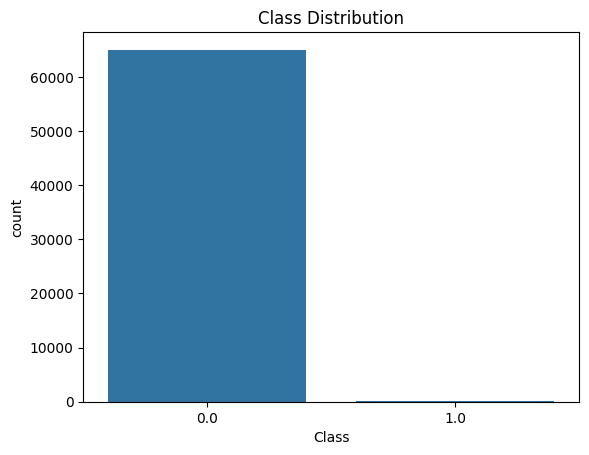

Class
0.0    99.74077
1.0     0.25923
Name: proportion, dtype: float64


In [ ]:
# Plot the class distribution
sns.countplot(x='Class', data=data)
plt.title('Class Distribution')
plt.show()

# Display class distribution in percentages
class_counts = data['Class'].value_counts(normalize=True) * 100
print(class_counts)


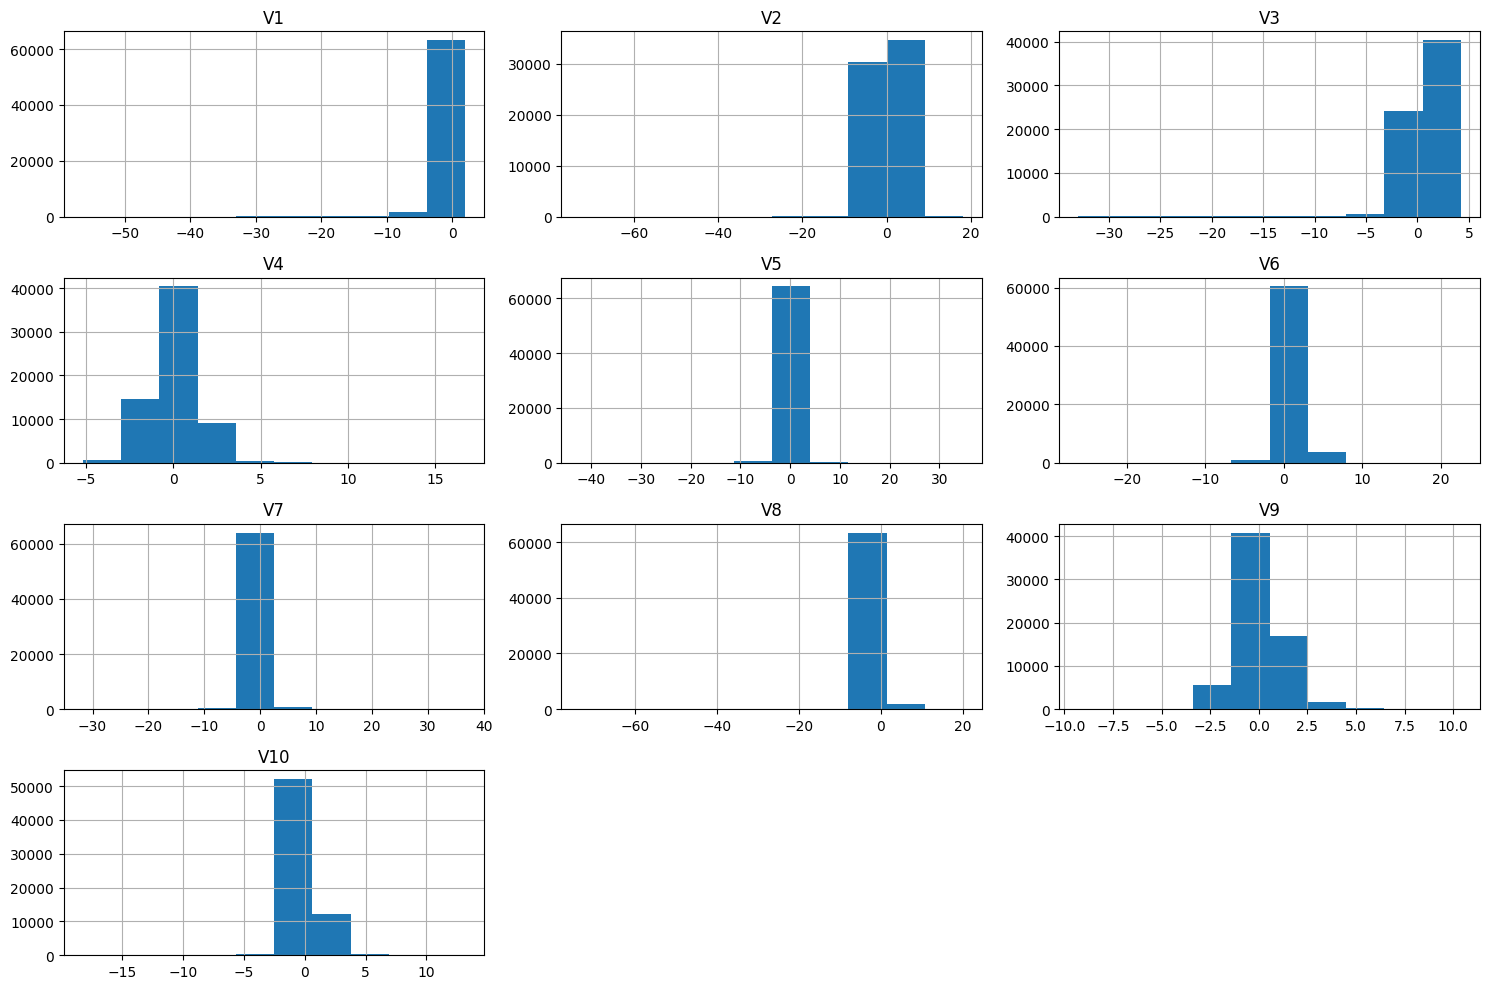

In [ ]:
# Plot histograms for the first few features
data.iloc[:, 1:11].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()


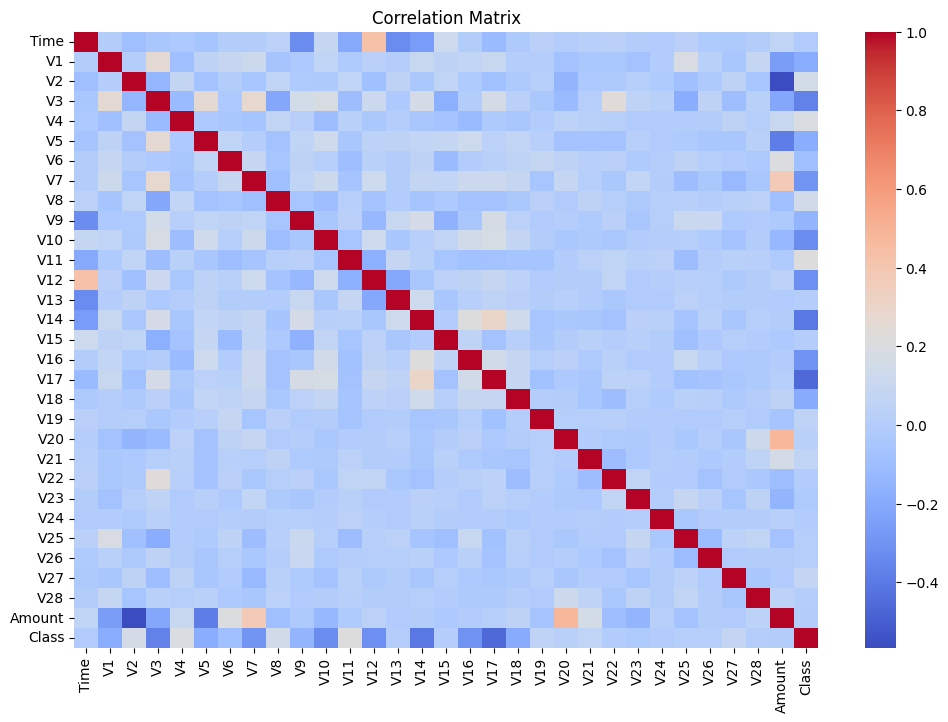

In [ ]:
# Compute and plot the correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


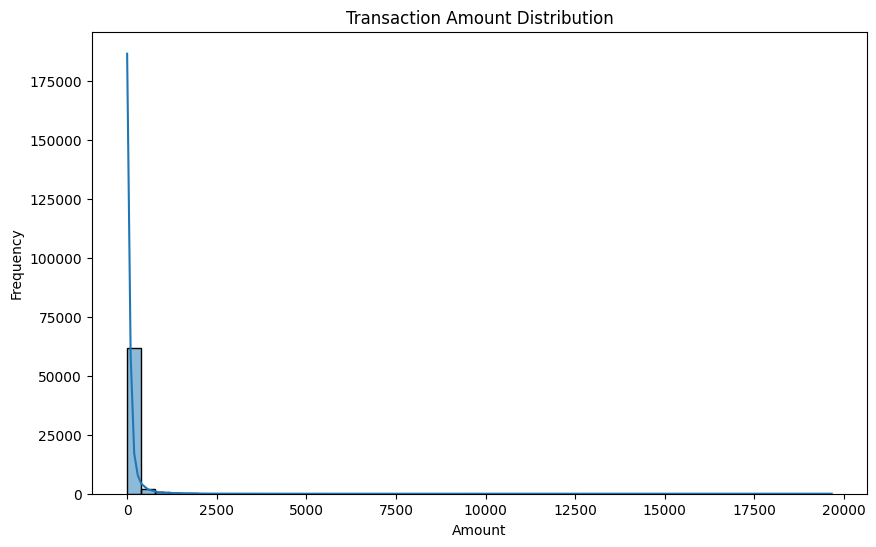

In [ ]:
# Plot the distribution of transaction amounts
plt.figure(figsize=(10, 6))
sns.histplot(data['Amount'], bins=50, kde=True)
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()


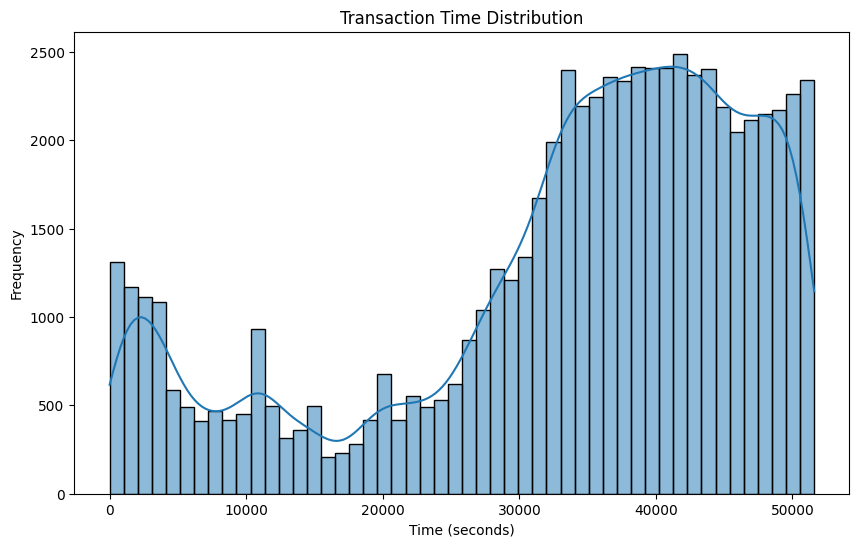

In [ ]:
# Plot the distribution of transaction times
plt.figure(figsize=(10, 6))
sns.histplot(data['Time'], bins=50, kde=True)
plt.title('Transaction Time Distribution')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')
plt.show()


Feature Engineering

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale the 'Amount' feature
scaler = StandardScaler()
data['normalized_amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))

# Drop the original 'Amount' column
data = data.drop(['Amount'], axis=1)


Model Building

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Split the data into features and target variable
X = data.drop('Class', axis=1)
y = data['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to balance the training set
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Initialize and train the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train_res, y_train_res)


RandomForestClassifier(random_state=42)

Model Evaluation


In [ ]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("SMOTE Results:")
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'F1-score: {f1_score(y_test, y_pred)}')
print('Classification Report:')
print(classification_report(y_test, y_pred))


SMOTE Results:
Accuracy: 0.9991563770227778
Precision: 0.8709677419354839
Recall: 0.7941176470588235
F1-score: 0.8307692307692308
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     13005
         1.0       0.87      0.79      0.83        34

    accuracy                           1.00     13039
   macro avg       0.94      0.90      0.92     13039
weighted avg       1.00      1.00      1.00     13039

